# Proyek Machine Learning : Recommendation System

Judul : Sistem Rekomendasi Destinasi Wisata Kota Semarang Berbasis Collaborative Filtering

Topik : Rekomendasi Wisata

Tujuan : Membuat sistem rekomendasi berbasis collaborative filtering untuk menampilkan top-n recommendation destinasi wisata di Kota Semarang berdasarkan data user, rating, dan place

Dataset yang digunakan : https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data?select=tourism_rating.csv

# Melakukan Import terhadap Library yang diperlukan

In [1]:
# Data Processing
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Data Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Avoiding warning while plotting on seaborn
import warnings
warnings.filterwarnings('ignore')

# Uploading file
import os

# DATA UNDERSTANDING

1. tourism_with_id.csv - mengandung informasi tempak wisata di 5 kota besar di Indonesia (hanya kota Bandung yang dipakai)

2. user.csv - mengandung informasi pengguna untuk membuat rekomendasi fitur berdasar pengguna

3. tourism_rating.csv - mengandung informasi pengguna, tempat wisata, dan rating untuk membuat sistem rekomendasi berdasar rating

# Menyiapkan Data yang akan digunakan


Menampilkan masing-masing dataset yaitu tourism_with_id.csv dan tourism_rating.csv menggunakan library pandas dari format .csv menjadi dataframe.

In [2]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('/content/tourism_rating.csv')
place = pd.read_csv('/content/tourism_with_id.csv')
user = pd.read_csv('/content/user.csv')

print('Jumlah place: ', len(place.Place_Id.unique()))
print('Jumlah rating: ', len(rating.Place_Ratings))

Jumlah place:  437
Jumlah rating:  10000


# Data Features Exploration

# Eksplorasi Fitur-fitur pada Data Place

In [3]:
# Melihat gambaran data place
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [4]:
#Melihat informasi data place
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


File ini terdiri dari 10 kolom sebagai berikut:

* Place_Id: kolom yang menunjukkan id dari setiap tempat wisata.
* Place_Name: kolom yang menunjukkan nama dari setiap tempat wisata.
* Description: kolom yang menunjukkan deskripsi dari setiap tempat wisata.
* Category: kolom yang menunjukkan kategori dari setiap tempat wisata.
* City: kolom yang menunjukkan kota dimana tempat wisata tersebut berada.
* Price: kolom yang menunjukkan harga tiket masuk ke tempat wisata tersebut.
* Rating: kolom yang menunjukkan rating dari setiap tempat wisata.
* Time_Minutes: kolom yang menunjukkan waktu yang diperlukan untuk mengunjungi tempat wisata tersebut.
* Coordinate: kolom yang menunjukkan koordinat dari setiap tempat wisata.
* Lat: kolom yang menunjukkan latitude dari setiap tempat wisata.
* Long: kolom yang menunjukkan longitude dari setiap tempat wisata.

In [5]:
# Membuang kolom yang tidak dipakai
place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [6]:
# Merubah data agar hanya dari Kota Semarang

place = place[place['City']=='Semarang']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,NaN,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394


In [7]:
# menghitung rata-rata (mean) dari kolom Time_Minutes pada sebuah DataFrame bernama place.
place.loc[:, ['Time_Minutes']].mean(axis = 0)

,0
Time_Minutes,70.357143


In [8]:
#Menampilkan sample dataset place
place.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,NaN,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394
336,337,Kampung Pelangi,Kampung pelangi atau dalam bahasa Inggris dise...,Taman Hiburan,Semarang,3000,4.3,30.0,"{'lat': -6.988881200000001, 'lng': 110.4083781}",-6.988881,110.408378
337,338,Lawang Sewu,"Lawang Sewu (""Seribu Pintu"") (bahasa Jawa: ꦭꦮꦁ...",Budaya,Semarang,10000,4.6,NaN,"{'lat': -6.9839099, 'lng': 110.4104342}",-6.983910,110.410434
338,339,Sam Poo Kong Temple,"Sam Poo Kong (Hanzi: ; Pinyin: Sānbǎo Dòng), j...",Budaya,Semarang,35000,4.5,NaN,"{'lat': -6.996236599999999, 'lng': 110.398122}",-6.996237,110.398122


In [9]:
#Melakukan pengecekan deskripsi statistik dataset places dengan fitur describe().
place.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long
count,57.000000,57.000000,57.000000,28.000000,57.000000,57.000000
mean,363.000000,17017.543860,4.361404,70.357143,-7.100864,110.403734
std,16.598193,34908.293748,0.244770,35.562375,0.133299,0.034778
min,335.000000,0.000000,3.400000,20.000000,-7.395606,110.293713
25%,349.000000,2000.000000,4.200000,45.000000,-7.225504,110.381068
50%,363.000000,5000.000000,4.400000,60.000000,-7.037211,110.408813
75%,377.000000,15000.000000,4.500000,90.000000,-6.983910,110.426451
max,391.000000,200000.000000,4.800000,180.000000,-6.945105,110.486253



Berdasarkan output diatas, didapatkan deskripsi statistik yaitu:

* count: Jumlah sampel data
* mean: Nilai rata-rata
* std: Standar deviasi
* min: Nilai minimum
* 25%: Kuartil bawah/Q1
* 50%: Kuartil tengah/Q2/median
* 75%: Kuartil atas/Q3
* max: Nilai maksimum

# Eksplorasi Fitur-fitur pada Data Rating

In [10]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB



File ini terdiri dari 3 kolom sebagai berikut:

* User_Id: identitas unik dari setiap pengguna.
* Place_Id: identitas unik dari setiap tempat wisata.
* Place_Ratings: penilaian atau rating yang diberikan oleh pengguna terhadap tempat wisata tertentu.

In [12]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Semarang
rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,5,335,3
1,20,335,4
2,41,335,5
3,55,335,2
4,70,335,3


In [13]:
# Melihat ukuran dataset rating untuk Kota Semarang

rating.shape

(1317, 3)

In [14]:
#Melakukan pengecekan deskripsi statistik dataset rating dengan fitur describe().
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,1317.000000,1317.000000,1317.000000
mean,150.662870,362.599848,3.034169
std,84.548453,16.470987,1.381451
min,1.000000,335.000000,1.000000
25%,78.000000,348.000000,2.000000
50%,147.000000,364.000000,3.000000
75%,224.000000,377.000000,4.000000
max,300.000000,391.000000,5.000000


# Eksplorasi Fitur-fitur pada Data User

In [15]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [16]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Bandung

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
23,1,"Semarang, Jawa Tengah",20
725,2,"Bekasi, Jawa Barat",21
1105,3,"Cirebon, Jawa Barat",23
326,4,"Bekasi, Jawa Barat",21
0,5,"Lampung, Sumatera Selatan",20


In [17]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Bandung

user.shape

(297, 3)

# Exploratory Data Analysis (EDA)

* Tahap eksplorasi penting untuk memahami variabel-variabel pada data serta korelasi antar variabel. Pemahaman terhadap variabel pada data dan korelasinya akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data kita. Idealnya, kita melakukan eksplorasi data terhadap seluruh variabel.

* Exploratory Data Analysis (EDA) memiliki peranan penting untuk dapat memahami dataset secara baik dan detail.

# Menampilkan informasi terkait tempat yang paling sering dirating

In [18]:
# Menghitung tempat yang paling sering dirating dan mereset indeks
top_10 = rating['Place_Id'].value_counts().reset_index(name='count').head(10)

# Mengganti nama kolom 'index' menjadi 'Place_Id' agar lebih jelas
top_10.rename(columns={'index': 'Place_Id'}, inplace=True)

# Merge dengan DataFrame place untuk mendapatkan nama tempat
top_10 = pd.merge(top_10, place[['Place_Id', 'Place_Name']], how='left', on='Place_Id')

# Menampilkan hasil
print(top_10)


   Place_Id  count                Place_Name
0       344     33             Pantai Marina
1       336     33           Grand Maerakaca
2       366     31        Tirto Argo Siwarak
3       367     31       Wisata Lereng Kelir
4       368     31             Kampoeng Rawa
5       369     31  Monumen Palagan Ambarawa
6       377     31            La Kana Chapel
7       355     30           Umbul Sidomukti
8       381     29        Tugu Muda Semarang
9       374     28         Hutan Pinus Kayon


# Menampilkan visualisasi data distribusi rating

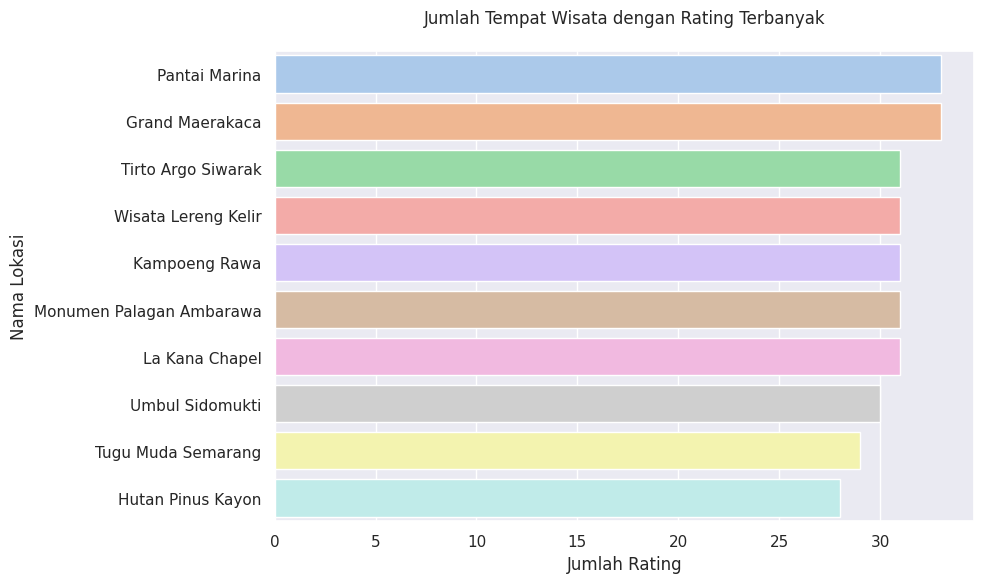

In [19]:
# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(y='Place_Name', x='count', data=top_10, palette='pastel')
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Lokasi')
plt.tight_layout()
plt.show()

# Menampilkan visualisasi perbandingan jumlah kategori wisata di Kota Semarang

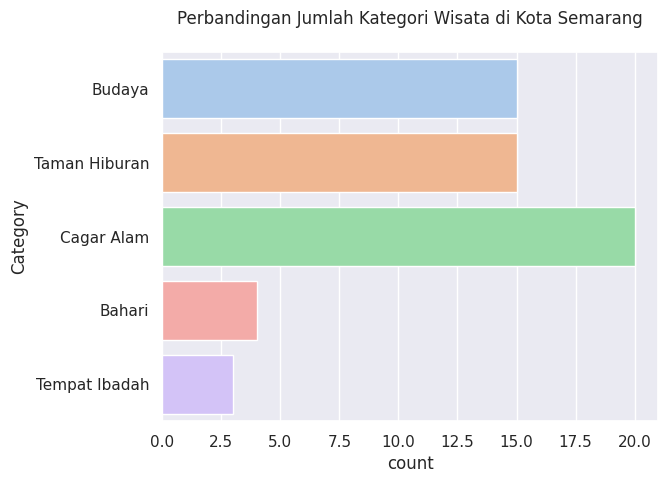

In [20]:
# Membuat visualisasi jumlah kategori wisata di Kota Semarang

sns.countplot(y='Category', data=place, palette='pastel')
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Semarang', pad=20)
plt.show()

# Menampilkan visualisasi distribusi usia pengunjung (user)

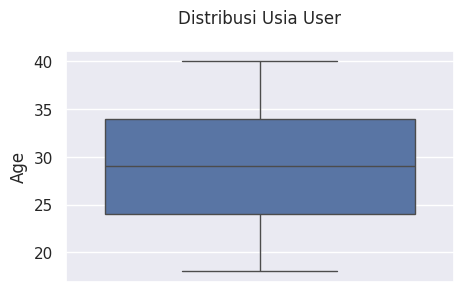

In [21]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

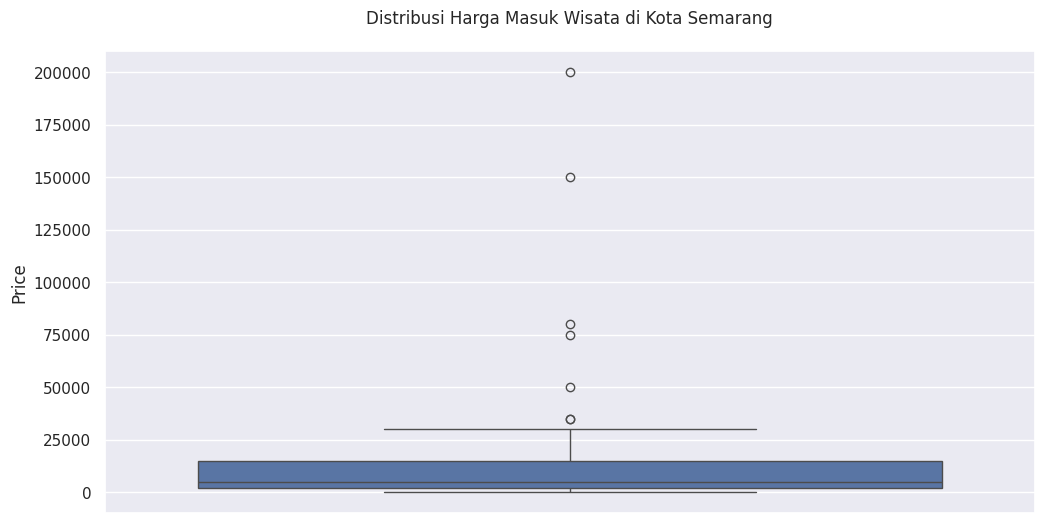

In [22]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(12,6))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Semarang', pad=20)
plt.show()

In [23]:
# menggabungkan Harga dan Waktu_Menit untuk tujuan Kategori
place.groupby("Category").agg({"Price":["mean", "sum"],
                       "Time_Minutes":["mean", "sum"]})

Price         Time_Minutes       
                       mean     sum         mean    sum
Category                                               
Bahari          4000.000000   16000    90.000000   90.0
Budaya         13166.666667  197500    60.625000  485.0
Cagar Alam     12025.000000  240500    61.875000  495.0
Taman Hiburan  34400.000000  516000    81.818182  900.0
Tempat Ibadah      0.000000       0          NaN    0.0

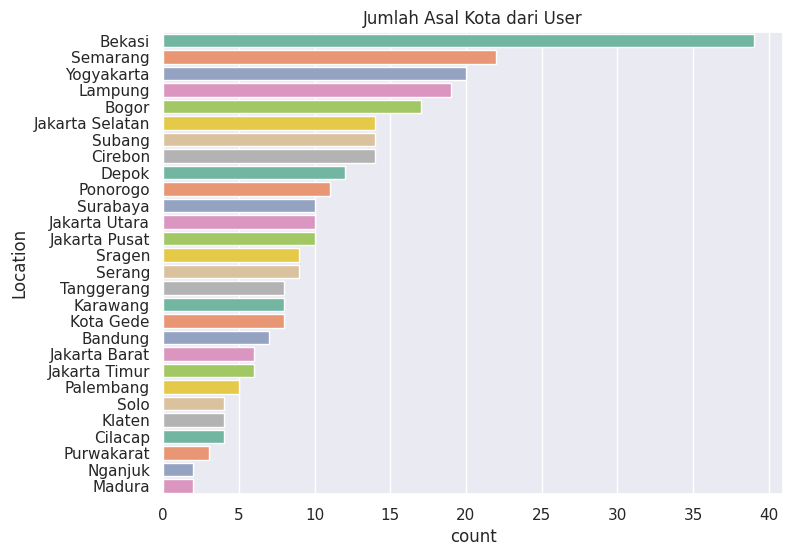

In [24]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot, order=askot.value_counts().index, palette='Set2')
plt.title('Jumlah Asal Kota dari User')
plt.show()

In [25]:
most_rated_users = user['User_Id'].value_counts()
most_rated_users

,count
User_Id,
1,1
205,1
203,1
202,1
201,1
...,...
100,1
99,1
98,1


In [26]:
most_rated_rating = rating['Place_Id'].value_counts()
most_rated_rating

,count
Place_Id,
344,33
336,33
366,31
367,31
368,31
369,31
377,31
355,30
381,29


Setelah melakukan Exploratory Data Analysis (EDA), kita memperoleh hasil:

* Semua (33) tempat yang paling sering dirating
* Semua (297) pengguna telah memberi peringkat minimal 1 kali

Untuk merekomendasikan tempat wisata dengan preferensi teratas, kita dapat meminta setiap pengguna memberi peringkat terhadap semua tempat wisata. Namun tentunya hal tersebut sedikit sulit dicapai. Solusinya kita akan mencoba memprediksi peringkat yang akan diberikan pengguna terhadap tempat wisata.

# DATA PREPARATION

Tahap data preparation merupakan proses transformasi data menjadi bentuk yang dapat diterima oleh model machine learning nanti. Proses data preparation yang dilakukan, yaitu membersihkan data missing value, dan melakukan pengecekan data duplikat.

# Membuat Salinan Data rating

In [27]:
# Membaca dataset untuk dilakukan encoding

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,5,335,3
1,20,335,4
2,41,335,5
3,55,335,2
4,70,335,3


# Menghapus Kolom yang Tidak Diperlukan


Data yang diperlukan hanya ada pada kolom Place_Id, Place_Name, dan Category, jadi hapus yang lain.

In [28]:
place = place.drop(['Description', 'City', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'], axis=1)

# Mengecek Missing Value

In [29]:
place.isnull().sum()

,0
Place_Id,0
Place_Name,0
Category,0
Price,0
Rating,0


In [30]:
rating.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


# Mengecek Data Duplikat

In [31]:
print(f'Jumlah data places yang duplikat: {place.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {rating.duplicated().sum()}')

Jumlah data places yang duplikat: 0
Jumlah data rating yang duplikat: 6


In [32]:
#Menghapus data duplikat
rating.drop_duplicates(inplace = True)

# Melakukan Encoding

In [33]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

# Encoding dan Mapping Kolom User

In [34]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

# Encoding dan Mapping Kolom Place

In [35]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

# Melihat Gambaran Data untuk Pemodelan

In [36]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 297, Number of Place: 57, Min Rating: 1.0, Max Rating: 5.0


In [37]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head()

,User_Id,Place_Id,Place_Ratings,user,place
261,83,345,4.0,176,10
991,47,377,1.0,173,42
554,288,358,5.0,225,23
49,255,336,5.0,44,1
857,238,371,3.0,228,36


# Modeling and Result

Tahap pengembangan modeling sistem rekomendasi dilakukan untuk membangun model sistem rekomendasi yang dapat menyarankan destinasi wisata terbaik bagi pengguna tertentu berdasarkan rating atau penilaian mereka terhadap destinasi wisata. Teknik yang digunakan untuk membangun model ini adalah content-based filtering recommendation dan collaborative filtering recommendation.

# Model Development dengan Content-based

# TF-IDF Vectorizer
TF-IDF Vectorizer digunakan untuk menemukan representasi fitur yang penting dari setiap kategori destinasi wisata. Alat ini dari library scikit-learn akan mengubah nilai-nilai tersebut menjadi vektor dengan menggunakan metode fit_transform dan transform, serta melakukan pemecahan data menjadi bagian-bagian yang lebih kecil secara langsung.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(place['Category'])

tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah', 'taman',
       'tempat'], dtype=object)

Mengubah data tempat pada kolom category menjadi bentuk vektor matriks

In [39]:
tfidf_matrix = tf.fit_transform(place['Category'])
tfidf_matrix.shape

(57, 8)

Mengubah bentuk vectorizer yaitu vektor menjadi bentuk matriks.

In [40]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.70710678, 0.        ],
        [0.70710678, 0.        , 0.        , 0.70710678, 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.70710678, 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.

In [41]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=place.Place_Name
).sample(10, axis=0)

,alam,bahari,budaya,cagar,hiburan,ibadah,taman,tempat
Place_Name,,,,,,,,
Wisata Lereng Kelir,0.707107,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.000000
Semarang Chinatown,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
Semarang Contemporary Art Gallery,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
Pura Giri Natha,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
GPIB Immanuel Semarang (Gereja Blenduk),0.000000,0.0,0.0,0.000000,0.000000,0.707107,0.000000,0.707107
Waduk Jatibarang,0.707107,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.000000
La Kana Chapel,0.000000,0.0,0.0,0.000000,0.707107,0.000000,0.707107,0.000000
Indonesia Kaya Park,0.000000,0.0,0.0,0.000000,0.707107,0.000000,0.707107,0.000000
Umbul Sidomukti,0.707107,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.000000


# Cosine Similarity
Melakukan perhitungan derajat kesamaan atau similatiry degree antar nama tempat wisata dengan teknik cosine similarity menggunakan library scikit-learn.

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])


Mengubah matriks cosine similarity menjadi bentuk dataframe antar nama tempat (destinasi wisata).

In [43]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=place.Place_Name, columns=place.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (57, 57)


Place_Name,Candi Gedong Songo,Grand Maerakaca,Kampung Pelangi,Lawang Sewu,Sam Poo Kong Temple,Desa Wisata Lembah Kalipancur,Hutan Wisata Tinjomoyo Semarang,Taman Kasmaran,Pantai Baruna,Pantai Marina,...,Kampoeng Kopi Banaran,Taman Tabanas,Kampung Tematik Jawi,Kampung Batik Gedong Semarang,Air Terjun Semirang,Obyek Wisata Goa Kreo,Watu Gunung Ungaran,Brown Canyon,Durian Gardens and Tourism Education Watu Simbar,Flower Farm Setiya Aji
Place_Name,,,,,,,,,,,,,,,,,,,,,
Monumen Palagan Ambarawa,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Kali Pancur,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Semarang Chinatown,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Kampoeng Djadhoel Semarang,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Kampoeng Kopi Banaran,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sam Poo Kong Temple,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Kampung Batik Gedong Semarang,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Kereta Ambarawa,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Taman Tabanas,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation Testing
Melakukan pendefinisian fungsi place_recommendations untuk menampilkan hasil rekomendasi tempat berdasarkan kesamaan kategori dari sebuah tempat.

In [44]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=place[['Place_Name', 'Category']], k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [45]:
place_name = 'Tugu Muda Semarang'
place[place.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Category,Price,Rating
380,381,Tugu Muda Semarang,Budaya,0,4.7


In [46]:
place_recommendations(place_name)

,Place_Name,Category
0,Candi Gedong Songo,Budaya
1,Semarang Chinatown,Budaya
2,Kampoeng Djadhoel Semarang,Budaya
3,Pura Giri Natha,Budaya
4,Benteng Pendem,Budaya



Berdasarkan hasil rekomendasi di atas, dapat dilihat bahwa sistem yang dibuat berhasil memberikan rekomendasi tempat berdasarkan sebuah tempat, yaitu 'Tugu Muda Semarang' dan dihasilkan rekomendasi tempat dengan kategori yang sama, yaitu budaya.

# Model Development dengan Collaborative Filtering

Collaborative Filtering adalah teknik merekomendasikan item yang mirip dengan preferensi pengguna yang sama di masa lalu, misalnya berdasarkan penilaian tempat yang telah diberikan oleh seorang pengguna. Sistem akan merekomendasikan tempat berdasarkan riwayat penilaian pengguna tersebut terhadap tempat dan kategorinya.

# Data Preparation

In [47]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [48]:
user_ids = rating['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

list User_Id:  [5, 20, 41, 55, 70, 105, 131, 139, 154, 157, 168, 187, 198, 200, 211, 215, 231, 233, 258, 281, 289, 298, 1, 23, 25, 28, 32, 35, 57, 63, 90, 104, 109, 115, 116, 121, 124, 129, 161, 177, 178, 196, 222, 236, 255, 266, 273, 277, 278, 285, 33, 45, 60, 86, 99, 106, 126, 135, 136, 138, 165, 210, 221, 227, 234, 257, 275, 290, 24, 27, 49, 59, 65, 76, 84, 87, 98, 150, 155, 156, 169, 170, 184, 202, 217, 224, 239, 259, 268, 283, 10, 17, 72, 95, 110, 114, 195, 207, 218, 228, 245, 267, 15, 39, 64, 77, 100, 143, 176, 194, 205, 226, 232, 253, 274, 9, 11, 34, 42, 67, 73, 78, 88, 93, 103, 122, 146, 180, 199, 237, 251, 299, 29, 51, 94, 128, 144, 149, 162, 225, 263, 271, 295, 71, 107, 112, 120, 137, 145, 152, 181, 197, 209, 230, 240, 261, 262, 300, 14, 19, 37, 52, 74, 75, 141, 153, 166, 173, 191, 235, 280, 31, 44, 47, 62, 68, 83, 118, 147, 190, 256, 284, 294, 6, 30, 53, 79, 92, 102, 117, 167, 174, 185, 216, 248, 16, 96, 101, 132, 158, 163, 204, 214, 223, 241, 242, 250, 254, 272, 4, 22, 58, 

In [49]:
#Proses encoding fitur Place_Id pada dataset ratings menjadi array.
place_ids = rating['Place_Id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

In [50]:
#Melakukan mapping atau pemetaan kolom user dan place ke dataset ratings yang berkaitan.
rating['user'] = rating['User_Id'].map(user_to_user_encoded)
rating['place'] = rating['Place_Id'].map(place_to_place_encoded)

In [51]:
#Melakukan pengecekan jumlah user, jumlah tempat, penilaian minimal, dan penilaian maksimal.
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

rating['rating'] = rating['Place_Ratings'].values.astype(np.float32)

min_rating = min(rating['rating'])
max_rating = max(rating['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Users Count: 297
Places Count: 57
Min rating: 1.0
Max rating: 5.0


# Pembagian data train dan test

In [52]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = rating[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = rating['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x,y)

[[  0   0]
 [  1   0]
 [  2   0]
 ...
 [ 87  56]
 [141  56]
 [ 21  56]] [0.5  0.75 1.   ... 0.   0.   0.75]


# Model Development
Melakukan pendefinisian kelas RecommenderNet untuk membangun model klasifikasi teks tersebut. Model ini akan memberikan rekomendasi kepada pengguna berdasarkan preferensi atau kecenderungan pengguna di masa lalu. Model ini dapat digunakan dalam berbagai bidang, seperti rekomendasi film, musik, produk, dan lain-lain. RecommenderNet menggunakan algoritma pembelajaran mesin seperti collaborative filtering atau content-based filtering untuk menentukan rekomendasi yang tepat untuk pengguna.

Parameter yang digunakan dalam model ini adalah:

1. **users_count**: jumlah user yang akan jadi input dimension pada user embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
2. **place_count**: jumlah tempat yang akan jadi input dimension pada tempat embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
3. **embedding_size**: ukuran embedding akan jadi output dimension pada user embedding dan tempat embedding, yaitu jumlah fitur yang dihasilkan oleh Embedding layer, yang merupakan hasil pengurangan dimensi dari input data.


Embedding layer ini akan mengubah representasi numerik dari input data menjadi representasi vektor yang lebih bermakna dan dapat dipahami oleh model machine learning.

In [53]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Proses kompilasi atau compile dengan:

1. **binary crossentropy loss function**: loss function untuk menghitung loss pada model klasifikasi biner.
2. **adam optimizer**: algoritma optimisasi yang digunakan untuk mengupdate bobot pada model machine learning secara efisien.
3. **metrik RMSE (Root Mean Square Error)**: metrik yang digunakan untuk mengukur seberapa jauh hasil prediksi dari model dari nilai aktual. RMSE dihitung dengan mencari rata-rata dari kuadrat error yang diakumulasikan dari seluruh data.

In [54]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [55]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)

In [56]:
# Melatih model.

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [callbacks]
)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.7253 - root_mean_squared_error: 0.3651 - val_loss: 0.8000 - val_root_mean_squared_error: 0.4174
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7509 - root_mean_squared_error: 0.3807 - val_loss: 0.7984 - val_root_mean_squared_error: 0.4167
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7440 - root_mean_squared_error: 0.3730 - val_loss: 0.7968 - val_root_mean_squared_error: 0.4159
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7212 - root_mean_squared_error: 0.3643 - val_loss: 0.7950 - val_root_mean_squared_error: 0.4151
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7337 - root_mean_squared_error: 0.3725 - val_loss: 0.7938 - val_root_mean_squared_error: 0.4145
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7369 - root_mean_squared_error: 0.3665 - val_loss: 0.7920 - val_root_mean_squared_error: 0.4137
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

Visualisasi grafik data training dan testing untuk masing-masing metrik Root Mean Square Error dan loss function.

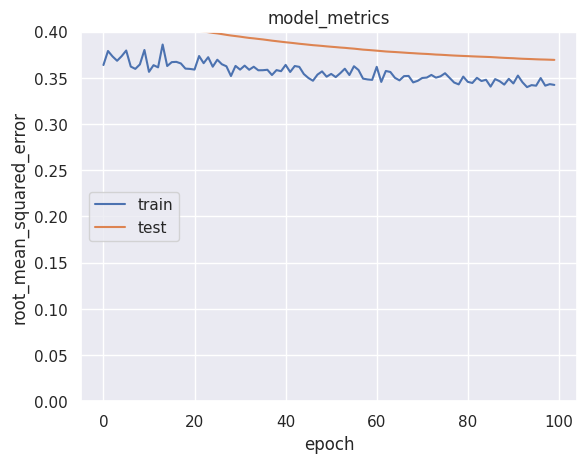

In [57]:
# Menampilkan plot loss dan validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

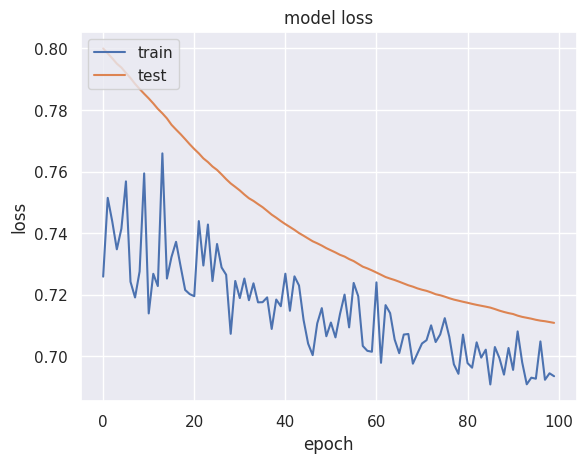

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tes Rekomendasi
Melakukan uji coba atau tes rekomendasi tempat yang diberikan. Namun perlu dikertahui terlebih dahulu untuk variabel khusus orang yang belum pernah mengunjungi tempat tersebut (belum memberikan rating) dengan place_not_rated.

In [59]:
place_df = place
rating_df = rating

In [60]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [62]:
place_df

,id,place_name,category,rating,price
334,335,Candi Gedong Songo,Budaya,4.5,10000
335,336,Grand Maerakaca,Taman Hiburan,4.4,15000
336,337,Kampung Pelangi,Taman Hiburan,4.3,3000
337,338,Lawang Sewu,Budaya,4.6,10000
338,339,Sam Poo Kong Temple,Budaya,4.5,35000
339,340,Desa Wisata Lembah Kalipancur,Taman Hiburan,3.9,0
340,341,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,4.3,3000
341,342,Taman Kasmaran,Taman Hiburan,4.5,3000
342,343,Pantai Baruna,Bahari,4.0,3000
343,344,Pantai Marina,Bahari,4.1,3000


In [63]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)


Melakukan pengujian prediksi hasil rekomendasi tempat berdasarkan nama tempat dan kategori.

In [69]:
# Mengambil top 10 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]  # Ambil 10 rekomendasi tertinggi
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

# Informasi User
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15, '\n')

# Tempat dengan rating wisata paling tinggi dari user
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by='Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

# Tampilkan destinasi yang pernah dikunjungi user dengan rating tertinggi
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name + ':', row.category)

print('')
print('----' * 15)
print('Top 10 place recommendation')
print('----' * 15)

# Tampilkan 10 rekomendasi wisata terbaik
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1, 11)):  # Ambil 10 tempat
    print(
        f"{i}. {row.place_name}\n    {row.category} Harga Tiket Masuk: {row.price}, Rating Wisata: {row.rating}\n"
    )

print('===' * 15)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Daftar rekomendasi untuk: User 208

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Water Blaster Bukit Candi Golf: Taman Hiburan
La Kana Chapel: Taman Hiburan
Masjid Agung Ungaran: Tempat Ibadah
Air Terjun Semirang: Cagar Alam

------------------------------------------------------------
Top 10 place recommendation
------------------------------------------------------------
1. Candi Gedong Songo
    Budaya Harga Tiket Masuk: 10000, Rating Wisata: 4.5

2. Grand Maerakaca
    Taman Hiburan Harga Tiket Masuk: 15000, Rating Wisata: 4.4

3. Desa Wisata Lembah Kalipancur
    Taman Hiburan Harga Tiket Masuk: 0, Rating Wisata: 3.9

4. Hutan Wisata Tinjomoyo Semarang
    Cagar Alam Harga Tiket Masuk: 3000, Rating Wisata: 4.3

5. Indonesia Kaya Park
    Taman Hiburan Harga Tiket Masuk: 0, Rating Wisata: 4.6

6. Pantai Cipta
    Baha

Berdasarkan hasil rekomendasi tempat di atas, dapat dilihat bahwa sistem rekomendasi mengambil pengguna acak (208), lalu dilakukan pencarian tempat dengan rating terbaik dari user tersebut.

* Water Blaster Bukit Candi Golf: **Taman Hiburan**
* La Kana Chapel: **Taman Hiburan**
* Masjid Agung Ungaran: **Tempat Ibadah**
* Air Terjun Semirang: **Cagar Alam**

Selanjutnya, sistem akan menampilkan 10 daftar tempat yang direkomendasikan berdasarkan kategori yang dimiliki terhadap data pengguna acak tadi. Dapat dilihat bahwa sistem merekomendasikan beberapa tempat dengan kategori yang sama, seperti

1. **Candi Gedong Songo** : Budaya
      
      Harga Tiket Masuk: 10000
      
      Rating Wisata: 4.5

2. **Grand Maerakaca** : Taman Hiburan
   
   Harga Tiket Masuk: 15000

   Rating Wisata: 4.4

3. **Desa Wisata Lembah Kalipancur** : Taman Hiburan
  
  Harga Tiket Masuk: 0
    
  Rating Wisata: 3.9

4. **Hutan Wisata Tinjomoyo Semarang** : Cagar Alam
  
  Harga Tiket Masuk: 3000
  
  Rating Wisata: 4.3

5. **Indonesia Kaya Park** : Taman Hiburan

  Harga Tiket Masuk: 0
  
  Rating Wisata: 4.6

6. **Pantai Cipta** : Bahari

  Harga Tiket Masuk: 5000
  
  Rating Wisata: 4.0

7. **Old City 3D Trick Art Museum** : Budaya

  Harga Tiket Masuk: 50000
  
  Rating Wisata: 4.4

8. **Taman Srigunting** : Taman Hiburan

  Harga Tiket Masuk: 0
  
  Rating Wisata: 4.7

9. **Wisata Alam Wana Wisata Penggaron** : Cagar Alam

  Harga Tiket Masuk: 10000
  
  Rating Wisata: 4.1

10. **Masjid Kapal Semarang** : Tempat Ibadah

  Harga Tiket Masuk: 0
    
  Rating Wisata: 4.1

# Kesimpulan

Dengan begitu, dapat disimpulkan bahwa sistem berhasil melakukan rekomendasi baik dengan pendekatan content-based filtering maupun collaborative filtering. Collaborative filtering membutuhkan data penilaian tempat dari pengguna,

sedangkan pada content-based filtering, data rating tidak dibutuhkan karena sistem akan merekomendasikan berdasarkan konten tempat tersebut, yaitu kategori.